In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR']= '/content/drive/MyDrive/kaggle'

In [2]:
%cd /content/drive/MyDrive/kaggle

/content/drive/MyDrive/kaggle


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import sklearn

In [4]:
df=pd.read_csv("/content/drive/MyDrive/kaggle/Housing.csv")

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df.shape

(545, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
df.drop_duplicates(inplace=True)
df.shape


(545, 13)

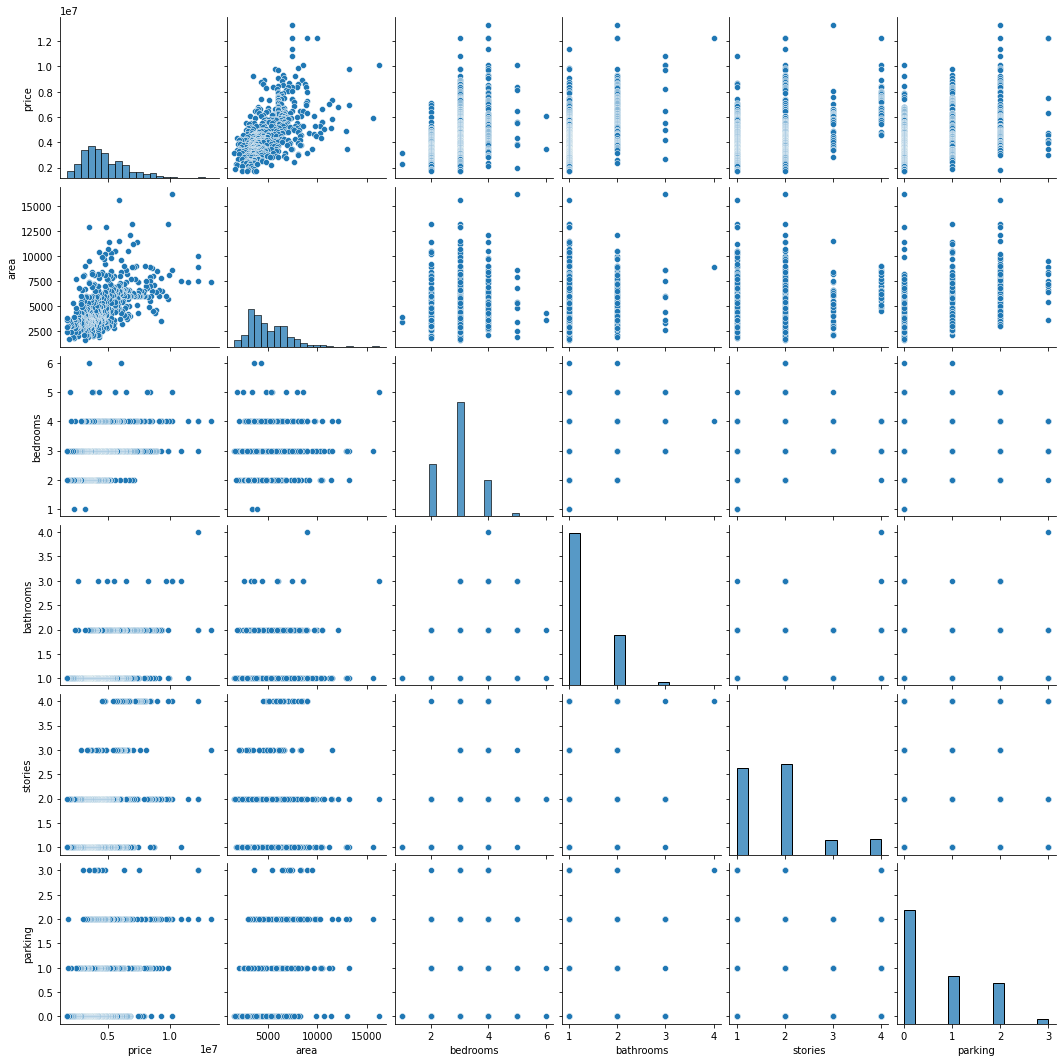

In [10]:
sns.pairplot(df)

In [11]:
df.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


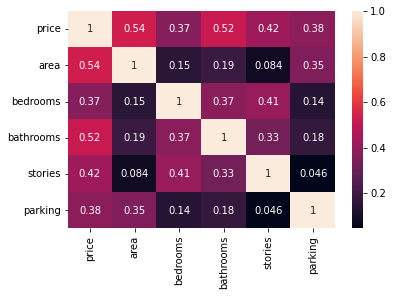

In [12]:
sns.heatmap(df.corr(),annot=True)

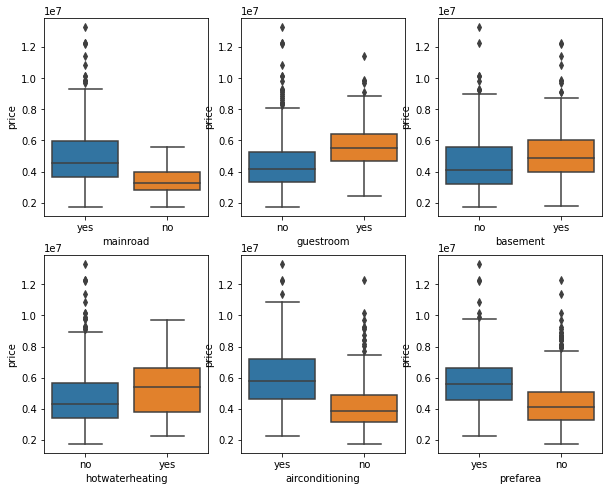

In [13]:
plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x='mainroad',y='price',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='guestroom',y='price',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='basement',y='price',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='hotwaterheating',y='price',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='airconditioning',y='price',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='prefarea',y='price',data=df)

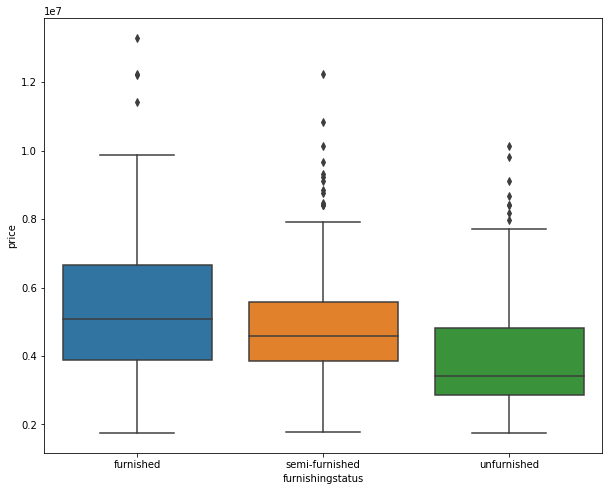

In [14]:
plt.figure(figsize=(10,8))
sns.boxplot(x='furnishingstatus',y='price',data=df)

In [15]:
df.mainroad.value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [16]:
df.guestroom.value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [17]:
df.basement.value_counts()

no     354
yes    191
Name: basement, dtype: int64

In [18]:
df.bathrooms.value_counts()

1    401
2    133
3     10
4      1
Name: bathrooms, dtype: int64

In [19]:
df.hotwaterheating.value_counts()

no     520
yes     25
Name: hotwaterheating, dtype: int64

In [20]:
df.airconditioning.value_counts()

no     373
yes    172
Name: airconditioning, dtype: int64

In [21]:
df.prefarea.value_counts()

no     417
yes    128
Name: prefarea, dtype: int64

In [22]:
df.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [23]:
#converting categorical columns
varlist=['mainroad','guestroom','basement','airconditioning','prefarea','hotwaterheating']
df[varlist]=df[varlist].apply(lambda x:x.map({'yes':1,'no':0}))


In [24]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [25]:
df1=pd.get_dummies(df['furnishingstatus'],drop_first=True)


In [26]:
df=pd.concat([df,df1],axis=1)

In [27]:
df.drop('furnishingstatus',axis=1,inplace=True)

In [28]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
df_train,df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
num_var=['price','area','bedrooms','bedrooms','stories','parking']
df_train[num_var]=scaling.fit_transform(df_train[num_var])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,1,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,2,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,2,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,2,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,2,0.333333,1,0,1,1,0,0.666667,0,0,1


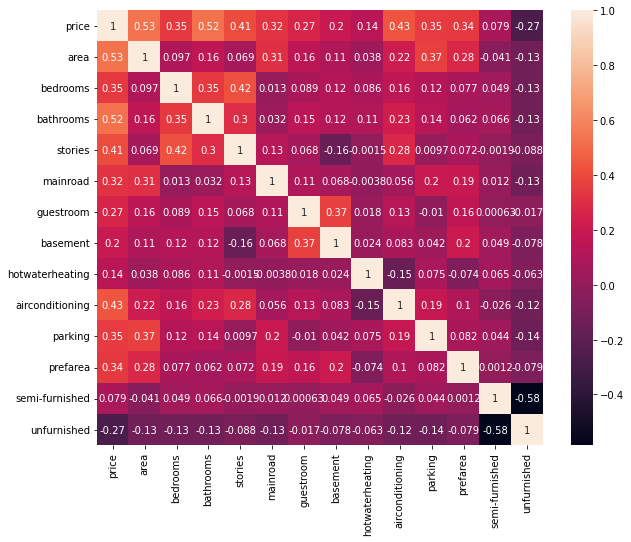

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(),annot=True)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
y_train=df_train.pop('price')
X_train=df_train
print(X_train.shape)
print(y_train.shape)

(381, 13)
(381,)


In [35]:
np.asarray(df_train)

array([[0.15522703, 0.4       , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.40337909, 0.4       , 2.        , ..., 1.        , 1.        ,
        0.        ],
       [0.1156283 , 0.4       , 2.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.13938754, 0.2       , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.36642027, 0.4       , 2.        , ..., 0.        , 0.        ,
        0.        ],
       [0.51601549, 0.2       , 1.        , ..., 0.        , 0.        ,
        1.        ]])

In [36]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,1,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,2,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,2,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,2,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,2,0.333333,1,0,1,1,0,0.666667,0,0,1


In [37]:
import statsmodels.api as sm

In [38]:
X_train_lm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_lm).fit()
lr.params

const             -0.075379
area               0.234664
bedrooms           0.046735
bathrooms          0.095412
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.060735
prefarea           0.059428
semi-furnished     0.000921
unfurnished       -0.031006
dtype: float64

In [39]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Wed, 10 Nov 2021   Prob (F-statistic):           8.83e-83
Time:                        07:02:33   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0754      0.023     -3.315      0.001      -0.120      -0.031
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.0954      0.011      8.679      0.000       0.074       0.117
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         18.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
print(lm.coef_)
print(lm.intercept_)

[ 0.23466354  0.04673453  0.09541159  0.10851563  0.05044144  0.03042826
  0.02159488  0.08486327  0.06688093  0.06073533  0.05942788  0.00092052
 -0.03100561]
-0.07537875257802035


In [42]:
from sklearn.feature_selection import RFE


In [43]:
rfe1=RFE(lm,10)
rfe1.fit(X_train,y_train)
list(zip(X_train.columns,rfe1.support_,rfe1.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [44]:
col1=X_train.columns[rfe1.support_]
col1

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [45]:
X_train.columns[~rfe1.support_]

Index(['basement', 'semi-furnished', 'unfurnished'], dtype='object')

In [46]:
X_train_rfe1=X_train[col1]


In [47]:
X_train_rfe1=sm.add_constant(X_train_rfe1)

In [48]:
lm1=sm.OLS(y_train,X_train_rfe1).fit()

In [49]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     74.89
Date:                Wed, 10 Nov 2021   Prob (F-statistic):           1.28e-82
Time:                        07:02:33   Log-Likelihood:                 374.65
No. Observations:                 381   AIC:                            -727.3
Df Residuals:                     370   BIC:                            -683.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0964      0.020     -4.800      0.000      -0.136      -0.057
area                0.2363      0.030      7.787      0.000       0.177       0.296
bedrooms            0.0661      0.037      1.794      0.074      -0.006       0.139
bathrooms           0.0991      0.011      8.927      0.000       0.077       0.121
stories             0.0977      0.019      5.251      0.000       0.061       0.134
mainroad            0.0556      0.014      3.848      0.000       0.027       0.084
guestroom           0.0381      0.013      2.934      0.004       0.013       0.064
hotwaterheating     0.0897      0.022      4.104      0.000       0.047       0.133
airconditioning     0.0711      0.011      6.235      0.000       0.049       0.093
parking             0.0637      0.018      3.488      0.001       0.028       0.100
prefarea            0.0643      0.012      5.445      0.000       0.041       0.088
==============================================================================
Omnibus:                       86.105   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.069
Skew:                           0.992   Prob(JB):                     7.60e-63
Kurtosis:                       6.753   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
X_train_rfe1_new=X_train_rfe1.drop(['bedrooms'],axis=1)

In [51]:
X_train_rfe1_new=sm.add_constant(X_train_rfe1_new)

In [52]:
lm2=sm.OLS(y_train,X_train_rfe1_new).fit()

In [53]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     82.37
Date:                Wed, 10 Nov 2021   Prob (F-statistic):           6.67e-83
Time:                        07:02:34   Log-Likelihood:                 373.00
No. Observations:                 381   AIC:                            -726.0
Df Residuals:                     371   BIC:                            -686.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0793      0.018     -4.472      0.000      -0.114      -0.044
area                0.2367      0.030      7.779      0.000       0.177       0.297
bathrooms           0.1035      0.011      9.537      0.000       0.082       0.125
stories             0.1096      0.017      6.280      0.000       0.075       0.144
mainroad            0.0536      0.014      3.710      0.000       0.025       0.082
guestroom           0.0390      0.013      2.991      0.003       0.013       0.065
hotwaterheating     0.0921      0.022      4.213      0.000       0.049       0.135
airconditioning     0.0710      0.011      6.212      0.000       0.049       0.094
parking             0.0669      0.018      3.665      0.000       0.031       0.103
prefarea            0.0653      0.012      5.513      0.000       0.042       0.089
==============================================================================
Omnibus:                       91.542   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.402
Skew:                           1.044   Prob(JB):                     3.25e-69
Kurtosis:                       6.938   Cond. No.                         13.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
a=X_train_rfe1_new.drop(['const'],axis=1)

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
vif=pd.DataFrame()
vif['features']=a.columns
vif['VIF']=[variance_inflation_factor(a.values,i) for i in range(a.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
1,bathrooms,5.64
3,mainroad,5.51
0,area,4.73
2,stories,2.17
7,parking,2.09
6,airconditioning,1.75
8,prefarea,1.47
4,guestroom,1.30
5,hotwaterheating,1.13


In [57]:
X_train_rfe1_new1=X_train_rfe1_new.drop(['bathrooms'],axis=1)

In [58]:
X_train_rfe1_new1=sm.add_constant(X_train_rfe1_new1)

In [59]:
lm3=sm.OLS(y_train,X_train_rfe1_new1).fit()

In [60]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     65.46
Date:                Wed, 10 Nov 2021   Prob (F-statistic):           2.34e-66
Time:                        07:02:34   Log-Likelihood:                 331.23
No. Observations:                 381   AIC:                            -644.5
Df Residuals:                     372   BIC:                            -609.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0305      0.015      2.030      0.043       0.001       0.060
area                0.2593      0.034      7.670      0.000       0.193       0.326
stories             0.1517      0.019      8.066      0.000       0.115       0.189
mainroad            0.0449      0.016      2.789      0.006       0.013       0.076
guestroom           0.0531      0.014      3.683      0.000       0.025       0.081
hotwaterheating     0.1189      0.024      4.921      0.000       0.071       0.166
airconditioning     0.0851      0.013      6.735      0.000       0.060       0.110
parking             0.0814      0.020      4.020      0.000       0.042       0.121
prefarea            0.0657      0.013      4.977      0.000       0.040       0.092
==============================================================================
Omnibus:                       88.679   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.077
Skew:                           1.056   Prob(JB):                     3.72e-59
Kurtosis:                       6.534   Cond. No.                         9.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
b=X_train_rfe1_new1.drop(['const'],axis=1)

In [62]:
vif=pd.DataFrame()
vif['features']=b.columns
vif['VIF']=[variance_inflation_factor(b.values,i) for i in range(b.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
0,area,4.48
2,mainroad,4.26
6,parking,2.08
1,stories,1.97
5,airconditioning,1.72
7,prefarea,1.47
3,guestroom,1.28
4,hotwaterheating,1.10


In [63]:
y_train_predict=lm3.predict(X_train_rfe1_new1)

Text(0.5, 0, 'Errors')

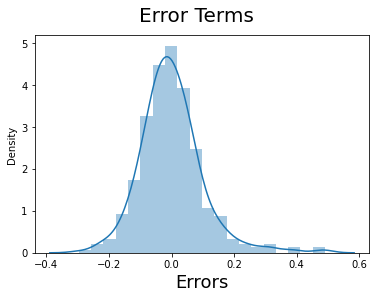

In [64]:
res=y_train-y_train_predict
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)  

In [65]:
num_var

['price', 'area', 'bedrooms', 'bedrooms', 'stories', 'parking']

In [66]:
df_test[num_var]=scaling.fit_transform(df_test[num_var])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.247651,0.084536,0.333333,1,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.530201,0.298969,0.333333,2,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.328859,0.592371,0.333333,1,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.261745,0.252234,0.333333,1,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.245638,0.226804,0.666667,1,0.333333,1,0,0,0,1,0.000000,0,1,0


In [67]:
y_test=df_test.pop('price')
X_test=df_test
print(X_test.shape)
print(y_test.shape)

(164, 13)
(164,)


In [70]:
X_test_new=X_test[b.columns]
X_test_new=sm.add_constant(X_test_new)
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 265 to 50
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   const            164 non-null    float64
 1   area             164 non-null    float64
 2   stories          164 non-null    float64
 3   mainroad         164 non-null    int64  
 4   guestroom        164 non-null    int64  
 5   hotwaterheating  164 non-null    int64  
 6   airconditioning  164 non-null    int64  
 7   parking          164 non-null    float64
 8   prefarea         164 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 12.8 KB


In [71]:
y_test_predict=lm3.predict(X_test_new)

Text(0, 0.5, 'y_test_pred')

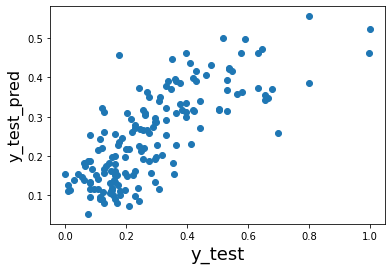

In [73]:
ffig = plt.figure()
plt.scatter(y_test, y_test_predict)
fig.suptitle('y_test vs y__test_predict', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16)  

In [74]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_predict)

0.531134228255371

In [75]:
X_test_new .shape

(164, 9)

In [77]:
r2=0.531134228255371

In [78]:
n = X_test_new .shape[0]
p =X_test_new .shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.5037329818547109

In [80]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_test_predict))

0.13008157149155233